In [80]:
import random

import numpy as np
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt

import nsfg, brfss, populations, thinkstats2, thinkplot, test_models, hinc
from analytic import ReadBabyBoom

### The exponential distribution

In [74]:
def exp_cdf(lambda_, x):
    return 1 - np.exp(-lambda_ * x)

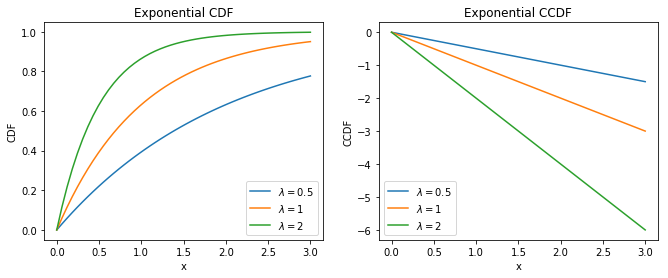

In [22]:
x = np.linspace(0.0, 3.0, 50)

y_lambda_0_5 = exp_cdf(0.5, x)
y_lambda_1 = exp_cdf(1, x)
y_lambda_2 = exp_cdf(2, x)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(x, y_lambda_0_5, label='$\lambda = 0.5$')
plt.plot(x, y_lambda_1, label='$\lambda = 1$')
plt.plot(x, y_lambda_2, label='$\lambda = 2$')

plt.legend()
plt.title('Exponential CDF')
plt.xlabel('x')
plt.ylabel('CDF')

plt.subplot(122)
plt.plot(x, np.log(1 - y_lambda_0_5), label='$\lambda = 0.5$')
plt.plot(x, np.log(1 - y_lambda_1), label='$\lambda = 1$')
plt.plot(x, np.log(1 - y_lambda_2), label='$\lambda = 2$')

plt.legend()
plt.title('Exponential CCDF')
plt.xlabel('x')
plt.ylabel('CCDF')

plt.show()

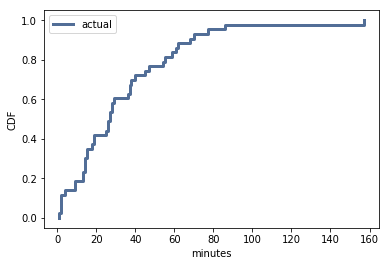

In [15]:
df = ReadBabyBoom(filename='data/babyboom.dat')
diffs = df.minutes.diff()
cdf = thinkstats2.Cdf(diffs, label='actual')

thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='minutes', ylabel='CDF')

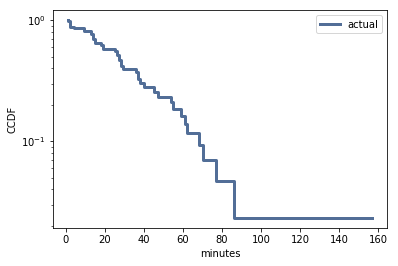

In [20]:
# complementary CDF: 1 - CDF(x) on a log-y scale
thinkplot.Cdf(cdf, complement=True)
thinkplot.Show(xlabel='minutes', ylabel='CCDF', yscale='log')

$\lambda$ can bre interpreted as a rate;

$\lambda = \frac{44}{1440} = 0.0306$ 

(the number of events that occur, on average, in a unit of time. In this example, 44 babies are born in 24 hours, or 1440 minutes.)

The mean of an exponential distribution is $\frac{1}{\lambda} = 32.7$(minutes)

### The normal distribution

In [24]:
def normal_cdf(x, mu, sigma):
    return scipy.stats.norm.cdf(x, loc=mu, scale=sigma)

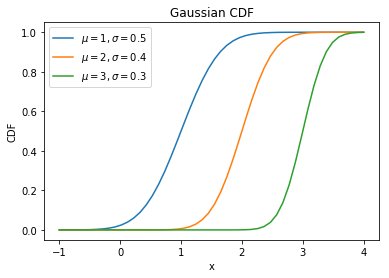

In [26]:
x = np.linspace(-1, 4, 50)

plt.plot(x, normal_cdf(x, 1, 0.5), label='$\mu=1, \sigma=0.5$')
plt.plot(x, normal_cdf(x, 2, 0.4), label='$\mu=2, \sigma=0.4$')
plt.plot(x, normal_cdf(x, 3, 0.3), label='$\mu=3, \sigma=0.3$')

plt.title('Gaussian CDF')
plt.xlabel('x')
plt.ylabel('CDF')
plt.legend()
plt.show()

In [29]:
df = nsfg.ReadFemPreg(dct_file='data/2002FemPreg.dct', 
                      dat_file='data/2002FemPreg.dat.gz')

In [50]:
all_live = df
full_term = df[df.prglngth > 36]

all_weights = df.totalwgt_lb.dropna()
ft_weights = full_term.totalwgt_lb.dropna()

all_weights_mean = all_weights.mean()
all_weights_std = all_weights.std()

ft_weights_mean = ft_weights.mean()
ft_weights_std = ft_weights.std()

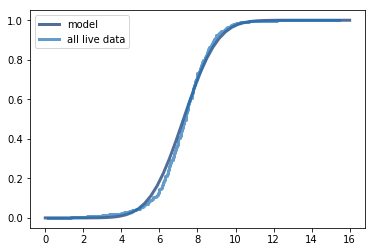

In [53]:
x = np.linspace(0, 16, 50)
y = normal_cdf(x, all_weights_mean, all_weights_std)

thinkplot.Plot(x, y, label='model')

cdf = thinkstats2.Cdf(all_weights, label='all live data')
thinkplot.Cdf(cdf)
thinkplot.Show()

### Normal probability plot

How to generate a plot:
1. Sort the values in the sample
2. From a standard normal distribution ($\mu = 0$ and $\sigma = 1$), generate a random sample with the same size as the sample, and sort it.
3. Plot the sorted values from the sample versus the random values.

If the distribution of the sample is approximately normal, the result is a straight line with intercept **mu** and slope **sigma**.

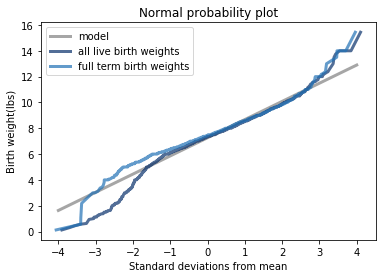

In [55]:
xs = [-4, 4]

# fxs: sorted xs
# fys: slope * xs + intercept
fxs, fys = thinkstats2.FitLine(xs, inter=weight_mean, slope=weight_std)
thinkplot.Plot(fxs, fys, color='gray', label='model')

all_xs, all_ys = thinkstats2.NormalProbability(all_weights)
thinkplot.Plot(all_xs, all_ys, label='all live birth weights')

ft_xs, ft_ys = thinkstats2.NormalProbability(ft_weights)
thinkplot.Plot(ft_xs, ft_ys, label='full term birth weights')

thinkplot.Show(xlabel='Standard deviations from mean',
               ylabel='Birth weight(lbs)',
               title='Normal probability plot')

Both curves match the model near the mean and deviate in the tails. The heaviest babies are heavier than what the model expects, and the lighter babies are lighter.

### The lognormal distribution

In [60]:
df = brfss.ReadBrfss(filename='data/CDBRFS08.ASC.gz')

In [ ]:
weights = df.wtkg2.dropna()
wgt_mean = weights.mean()
wgt_std = weights.std()

log_weights = np.log10(weights)
log_wgt_mean = log_weights.mean()
log_wgt_std = log_weights.std()

model_x = np.linspace(weights.min(), weights.max(), 50)
model_y = normal_cdf(model_x, wgt_mean, wgt_std)

model_log_x = np.linspace(log_weights.min(), log_weights.max(), 50)
model_log_y = normal_cdf(model_log_x, log_wgt_mean, log_wgt_std)

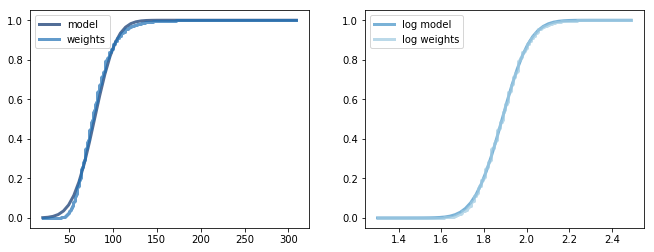

In [78]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
thinkplot.Plot(model_x, model_y, label='model')

cdf = thinkstats2.Cdf(weights, label='weights')
thinkplot.Cdf(cdf)
plt.legend()

plt.subplot(122)
thinkplot.Plot(model_log_x, model_log_y, label='log model')

log_cdf = thinkstats2.Cdf(log_weights, label='log weights')
thinkplot.Cdf(log_cdf)
plt.legend()

plt.show()

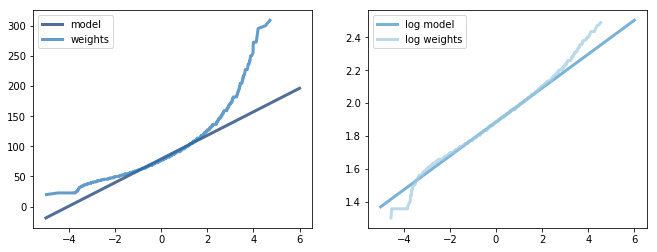

In [81]:
xs = [-5, 6]

plt.figure(figsize=(11, 4))

plt.subplot(121)
fxs, fys = thinkstats2.FitLine(xs, wgt_mean, wgt_std)
thinkplot.Plot(fxs, fys, label='model')

wgt_xs, wgt_ys = thinkstats2.NormalProbability(weights)
thinkplot.Plot(wgt_xs, wgt_ys, label='weights')
plt.legend()

plt.subplot(122)
fxs, fys = thinkstats2.FitLine(xs, log_wgt_mean, log_wgt_std)
thinkplot.Plot(fxs, fys, label='log model')

log_wgt_xs, log_wgt_ys = thinkstats2.NormalProbability(log_weights)
thinkplot.Plot(log_wgt_xs, log_wgt_ys, label='log weights')
plt.legend()

plt.show()

### The Pareto distribution

In [82]:
def pareto_cdf(x, min_x, alpha):
    return 1 - np.power((x / min_x), -alpha)

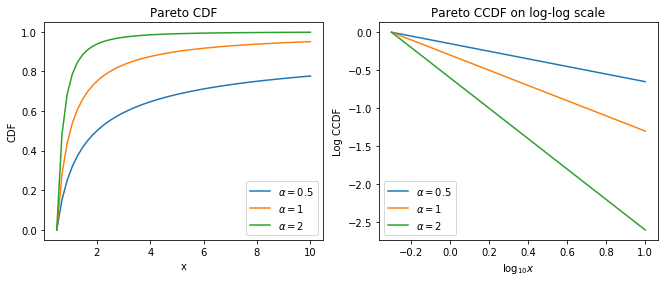

In [90]:
min_x = 0.5
x = np.linspace(min_x, 10, 50)
y_alpha_2 = pareto_cdf(x, min_x, 2)
y_alpha_1 = pareto_cdf(x, min_x, 1)
y_alpha_0_5 = pareto_cdf(x, min_x, 0.5)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(x, y_alpha_0_5, label='$\\alpha = 0.5$')
plt.plot(x, y_alpha_1, label='$\\alpha = 1$')
plt.plot(x, y_alpha_2, label='$\\alpha = 2$')

plt.legend()
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('Pareto CDF')

log_x = np.log10(x)

plt.subplot(122)
plt.plot(log_x, np.log10(1 - y_alpha_0_5), label='$\\alpha = 0.5$')
plt.plot(log_x, np.log10(1 - y_alpha_1), label='$\\alpha = 1$')
plt.plot(log_x, np.log10(1 - y_alpha_2), label='$\\alpha = 2$')

plt.legend()
plt.xlabel('$\log_{10}{x}$')
plt.ylabel('Log CCDF')
plt.title('Pareto CCDF on log-log scale')
plt.show()

In [2]:
pops = populations.ReadData('data/PEP_2012_PEPANNRES_with_ann.csv')

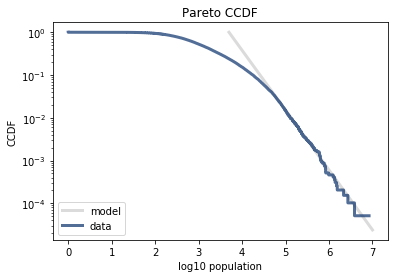

In [3]:
pop_cdf = thinkstats2.Cdf(pops)
log_pop_cdf = thinkstats2.Cdf(np.log10(pops), label='data')

xs, ys = thinkstats2.RenderParetoCdf(xmin=5000, alpha=1.4, low=0, high=1e7)
thinkplot.Plot(np.log10(xs), 1-ys, label='model', color='0.8')

thinkplot.Cdf(log_pop_cdf, complement=True) 
thinkplot.Config(xlabel='log10 population',
                 ylabel='CCDF', title='Pareto CCDF',
                 yscale='log', loc='lower left')

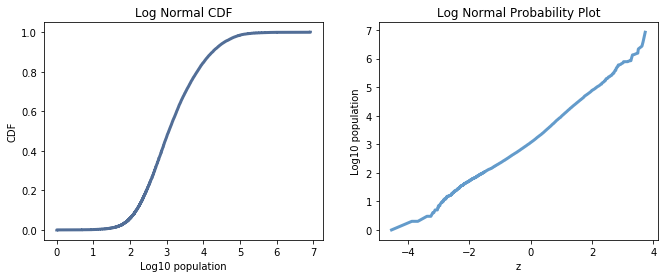

In [10]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
thinkplot.Cdf(log_pop_cdf)
plt.xlabel('Log10 population')
plt.ylabel('CDF')
plt.title('Log Normal CDF')

plt.subplot(122)
xs, ys = thinkstats2.NormalProbability(np.log10(pops))
thinkplot.Plot(xs, ys)
plt.title('Log Normal Probability Plot')
plt.xlabel('z')
plt.ylabel('Log10 population')

plt.show()

Neither model is perfect. The Pareto model only applies to the largest 1% of cities, but it is a better fit for that part of the distribution. The lognormal model is a better fit for the other 99%. Which model is appropriate depends on which part of the distribution is relevant.

### Generating random numbers

$p = CDF(x)$

$x = ICDF(p)$

For example, the CDF of the exponential distribution is:

$p = 1 - e^{-\lambda x}$

Solving for x yields:

$x = \frac{-\log(1-p)}{\lambda}$

In [13]:
def expovariate(lambda_):
    p = np.random.random()
    x = -np.log(1-p) / lambda_
    
    return x

In [14]:
expovariate(0.5)

3.0609789586060145

### Exercises

In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.

In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use `scipy.stats.norm.cdf`.

In [17]:
feetToCmRatio = 30.48
inchToCmRatio = 2.54

mu = 178
sigma = 7.7

minHeight = 5 * feetToCmRatio + 10 * inchToCmRatio
maxHeight = 6 * feetToCmRatio + 1 * inchToCmRatio

minPercentage = scipy.stats.norm.cdf(minHeight, loc=mu, scale=sigma) * 100
maxPercentage = scipy.stats.norm.cdf(maxHeight, loc=mu, scale=sigma) * 100

print(minPercentage, maxPercentage)

48.96390278648327 83.23858654963064


To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters xm = 1 m and α = 1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.

Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be?

`scipy.stats.pareto` represents a pareto distribution.  In Pareto world, the distribution of human heights has parameters alpha=1.7 and xmin=1 meter.  So the shortest person is 100 cm and the median is 150.

In [18]:
alpha = 1.7
xmin = 1       # meter
dist = scipy.stats.pareto(b=alpha, scale=xmin)
dist.median()

1.5034066538560549

In [19]:
dist.mean()

2.428571428571429

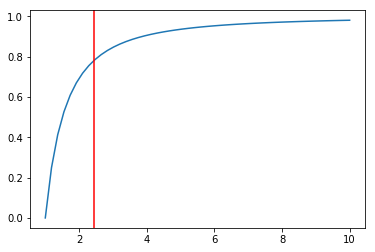

In [25]:
x = np.linspace(1, 10, 50)
y = dist.cdf(x)

plt.plot(x, y)
plt.axvline(x=dist.mean(), color='r')
plt.show()

In [28]:
(1 - dist.cdf(1000)) * 7000000000 # 7 billion

55602.976430479954

In [33]:
dist.ppf(0.9999999999) # ppf is inverse cdf

762698.5487811919

The Weibull distribution is a generalization of the exponential distribution that comes up in failure analysis (see http://wikipedia.org/wiki/Weibull_distribution). Its CDF is

$\mathrm{CDF}(x) = 1 − \exp[−(x / λ)^k]$ 

Can you find a transformation that makes a Weibull distribution look like a straight line? What do the slope and intercept of the line indicate?

Use `random.weibullvariate` to generate a sample from a Weibull distribution and use it to test your transformation.

Generate a sample from a Weibull distribution and plot it using a transform that makes a Weibull distribution look like a straight line.

{'xscale': 'linear', 'yscale': 'linear'}

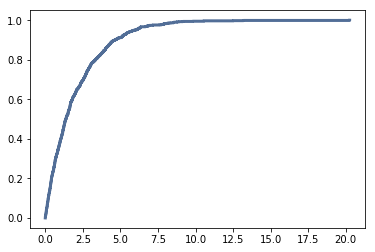

In [67]:
samples = np.array([random.weibullvariate(2, 1) for _ in range(1000)])

weibull_cdf = thinkstats2.Cdf(samples, label='weibull')

thinkplot.Cdf(weibull_cdf)

In [69]:
def weibull_cdf(x, alpha, beta):
    return 1 - np.exp(-np.power(x/beta, alpha))

//anaconda/envs/rl/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


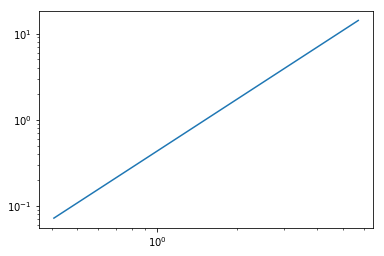

In [72]:
x = np.linspace(0, 20, 50)
y = -np.log10(1 - weibull_cdf(x, 2, 1))

plt.plot(x, y)
plt.xscale('log')
plt.yscale('log')

For small values of `n`, we don’t expect an empirical distribution to fit an analytic distribution exactly. One way to evaluate the quality of fit is to generate a sample from an analytic distribution and see how well it matches the data.

For example, in Section 5.1 we plotted the distribution of time between births and saw that it is approximately exponential. But the distribution is based on only 44 data points. To see whether the data might have come from an exponential distribution, generate 44 values from an exponential distribution with the same mean as the data, about 33 minutes between births.

Plot the distribution of the random values and compare it to the actual distribution. You can use random.expovariate to generate the values.

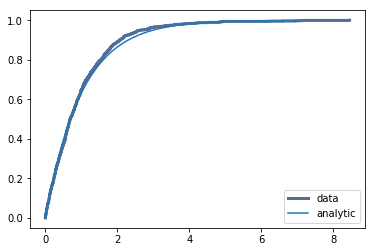

In [76]:
lambd = 1
samples = [random.expovariate(1) for _ in range(1000)]

expo_cdf = thinkstats2.Cdf(samples, label='data')
thinkplot.Cdf(expo_cdf)

x = np.linspace(0, 7, 50)
y = exp_cdf(lambd, x)

plt.plot(x, y, label='analytic')
plt.legend()
plt.show()

In the repository for this book, you’ll find a set of data files called mystery0.dat, mystery1.dat, and so on. Each contains a sequence of random numbers generated from an analytic distribution.
You will also find test_models.py, a script that reads data from a file and plots the CDF under a variety of transforms.

Based on these plots, you should be able to infer what kind of distribution generated each file. If you are stumped, you can look in mystery.py, which contains the code that generated the files.

//anaconda/envs/rl/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/taeksoonjang/github/think-stats/thinkplot.py:118: UserWarning: Ran out of colors.  Starting over.
  warnings.warn('Ran out of colors.  Starting over.')


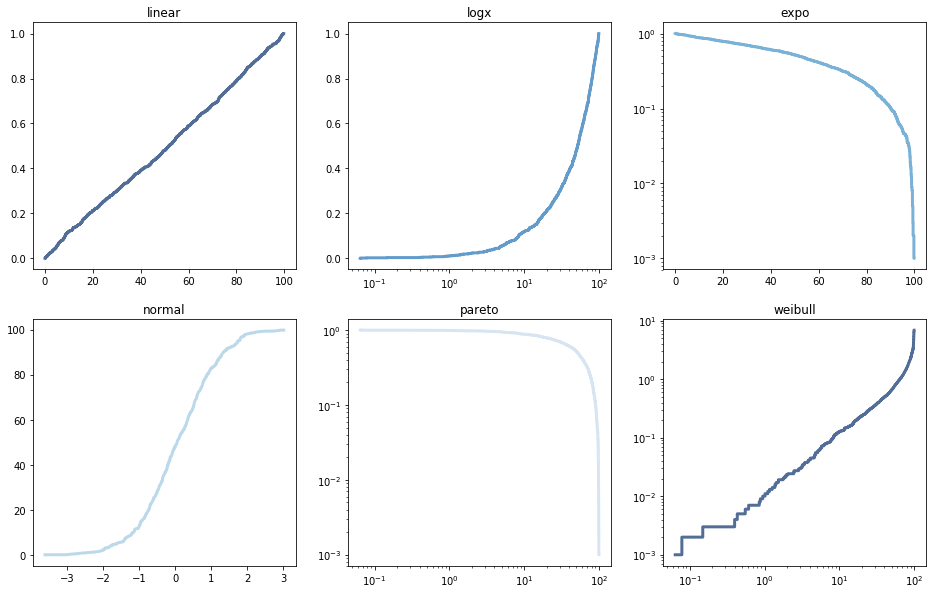

In [78]:
test_models.main('', 'data/mystery0.dat')

//anaconda/envs/rl/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/taeksoonjang/github/think-stats/thinkplot.py:118: UserWarning: Ran out of colors.  Starting over.
  warnings.warn('Ran out of colors.  Starting over.')


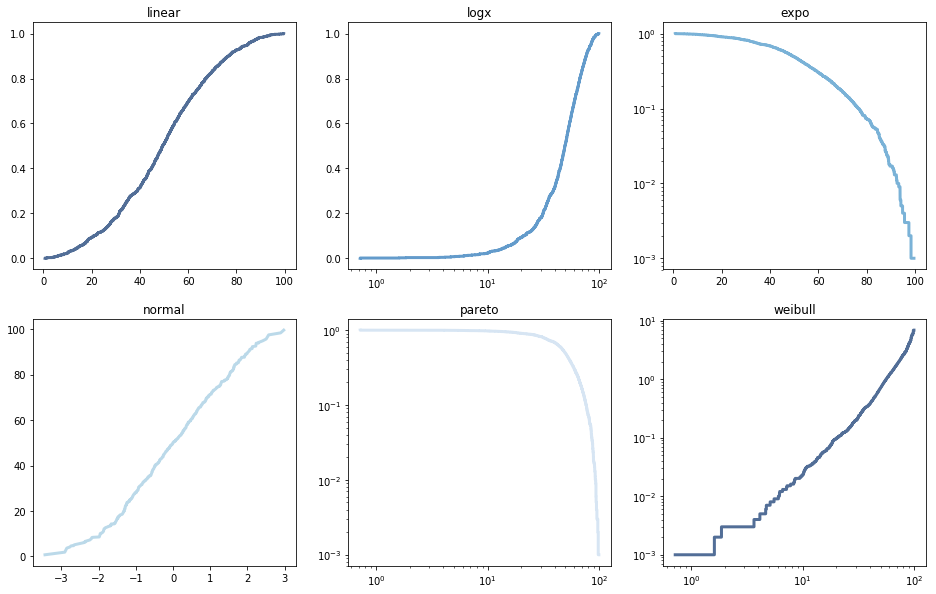

In [79]:
test_models.main('', 'data/mystery1.dat')

The distributions of wealth and income are sometimes modeled using lognormal and Pareto distributions. To see which is better, let’s look at some data.

The Current Population Survey (CPS) is a joint effort of the Bureau of Labor Statistics and the Census Bureau to study income and related variables. Data collected in 2013 is available from http://www.census.gov/hhes/www/cpstables/032013/hhinc/toc.htm. I downloaded `hinc06.xls`, which is an Excel spreadsheet with information about household income, and converted it to `hinc06.csv`, a CSV file you will find in the repository for this book. You will also find `hinc.py`, which reads this file.

Extract the distribution of incomes from this dataset. Are any of the analytic distributions in this chapter a good model of the data?

In [82]:
df = hinc.ReadData(filename='data/hinc06.csv')
df.head()

,income,freq,cumsum,ps
0,4999.0,4204,4204,0.034330
1,9999.0,4729,8933,0.072947
2,14999.0,6982,15915,0.129963
3,19999.0,7157,23072,0.188407
4,24999.0,7131,30203,0.246640


{'xscale': 'linear', 'yscale': 'linear'}

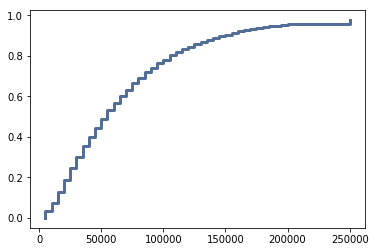

In [88]:
xs, ps = df.income.values, df.ps.values

income_cdf = thinkstats2.Cdf(xs, ps, label='data')
income_log_cdf = thinkstats2.Cdf(np.log10(xs), ps, label='data')

thinkplot.Cdf(income_cdf)

To check whether a Pareto model describes the data well, I plot the CCDF on a log-log scale.

I found parameters for the Pareto model that match the tail of the distribution.

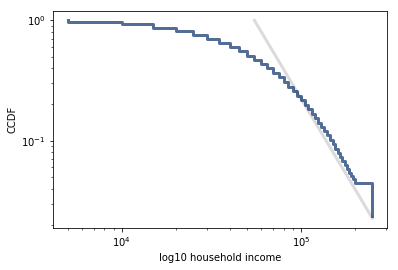

In [86]:
xs, ys = thinkstats2.RenderParetoCdf(xmin=55000, alpha=2.5, 
                                     low=0, high=250000)

thinkplot.Plot(xs, 1-ys, label='model', color='0.8')

thinkplot.Cdf(income_cdf, complement=True) 
thinkplot.Config(xlabel='log10 household income',
                 ylabel='CCDF',
                 xscale='log',
                 yscale='log', 
                 loc='lower left')

For the lognormal model I estimate mu and sigma using percentile-based statistics (median and IQR).

In [89]:
median = income_log_cdf.Percentile(50)
iqr = income_log_cdf.Percentile(75) - income_log_cdf.Percentile(25)
std = iqr / 1.349

# choose std to match the upper tail
std = 0.35
print(median, std)

4.740354793159152 0.35


Here's what the distribution, and fitted model, look like on a log-x scale.

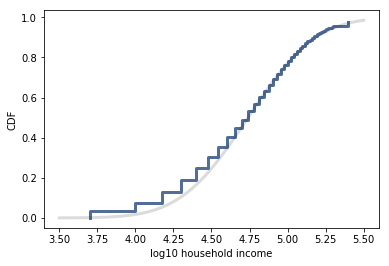

In [91]:
xs, ps = thinkstats2.RenderNormalCdf(median, std, low=3.5, high=5.5)
thinkplot.Plot(xs, ps, label='model', color='0.8')

thinkplot.Cdf(income_log_cdf) 
thinkplot.Config(xlabel='log10 household income',
                 ylabel='CDF')

My conclusions based on these figures are:

1) The Pareto model might be a reasonable choice for the top
   10-20% of incomes.

2) The lognormal model captures the shape of the distribution better,
   with some deviation in the left tail.  With different
   choices for sigma, you could match the upper or lower tail, but not
   both at the same time.
 
In summary I would say that neither model captures the whole distribution,
so you might have to 

1) look for another analytic model, 

2) choose one that captures the part of the distribution that is most 
   relevent, or 

3) avoid using an analytic model altogether.